In [18]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import optuna
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
train=pd.read_csv("/kaggle/input/ml-league-supervised-learning-competition/train.csv")
test=pd.read_csv("/kaggle/input/ml-league-supervised-learning-competition/test.csv")

# EDA

In [8]:
train.shape, test.shape

((15000, 19), (10000, 18))

In [9]:
train.columns

Index(['id', 'Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [10]:
test.columns

Index(['id', 'Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'],
      dtype='object')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitset           

In [12]:
train.head()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,683.0,25.0,0.50,0.38,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.383582,0.399556,30.546306,3923.90628
1,1,330.0,12.5,0.25,0.25,0.75,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.480073,0.448973,35.598217,5596.22636
2,2,155.0,12.5,0.25,0.25,0.38,0.38,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.594206,0.495898,41.059194,7406.90248
3,3,293.0,12.5,0.25,0.25,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.572046,0.486486,39.773462,7270.31832
4,4,343.0,12.5,0.25,0.25,0.75,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.532304,0.460322,37.209554,6132.99793


In [13]:
train.isnull().sum()

id                      0
Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='yield', ylabel='Count'>

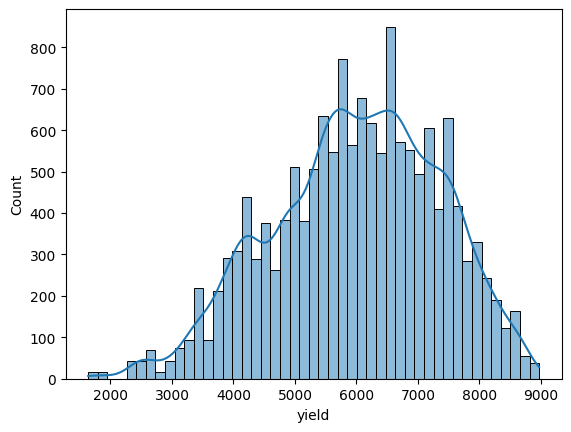

In [14]:
sns.histplot(train['yield'],kde='True')

In [15]:
correlation=train.corr()['yield'].sort_values(ascending=False)
print(correlation)

yield                   1.000000
fruitset                0.952338
seeds                   0.917960
fruitmass               0.890149
osmia                   0.272579
bumbles                 0.177254
andrena                 0.138811
AverageOfLowerTRange    0.014435
MaxOfLowerTRange        0.014384
MaxOfUpperTRange        0.014379
MinOfLowerTRange        0.014295
AverageOfUpperTRange    0.014262
MinOfUpperTRange        0.014179
id                     -0.003041
Row#                   -0.013453
honeybee               -0.118594
clonesize              -0.407381
RainingDays            -0.509233
AverageRainingDays     -0.520383
Name: yield, dtype: float64


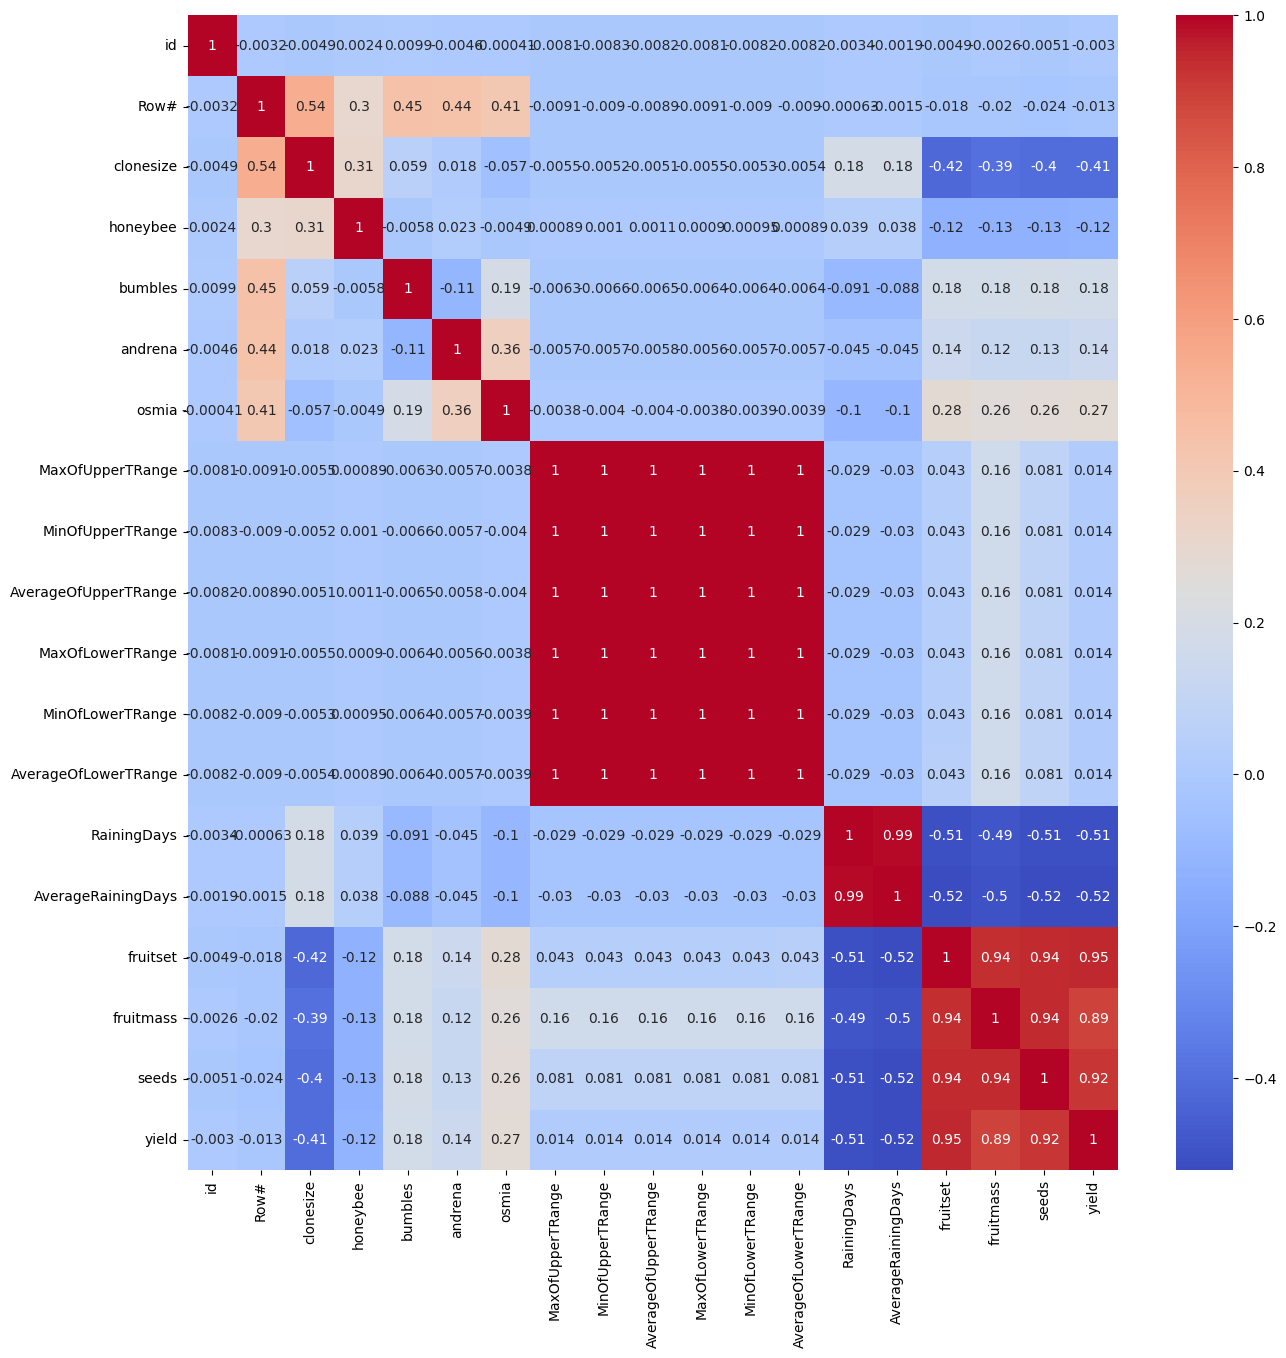

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.show()

* MaxOfUpperTRange, MinOfUpperTRange, AverageOfUpperTRange, MaxOfLowerTRange, MinOfLowerTRange, AverageOfLowerTRange are highly redundant columns, and perfectly correlated, so only one column can replace these.
* Obviously  row# has no relevence so dropped

In [4]:
train.drop(['MaxOfUpperTRange', 'MinOfUpperTRange','MaxOfLowerTRange', 'MinOfLowerTRange','Row#'],axis=1,inplace=True)

In [5]:
test.drop([ 'Row#', 
       'MaxOfUpperTRange', 'MinOfUpperTRange', 
       'MaxOfLowerTRange', 'MinOfLowerTRange', ],axis=1,inplace=True)

In [6]:

features = [col for col in train.columns if col != 'yield']

X = train[features]
y = train['yield']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



# Helper Functions

In [7]:
def evaluate_model(name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Performance:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE : {mae:.4f}")
    print(f"  R²  : {r2:.4f}\n")

In [31]:
def create_submission(model,test):
    preds=model.predict(test)
    submission = pd.DataFrame({
        'id': test['id'], 
        'yield': preds
    })
    submission.to_csv('submission.csv', index=False)
    print("Submission file created: submission.csv")

In [8]:
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Models


Linear Regression

In [30]:
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
evaluate_model("Linear Regression",y_test,lr_preds)

Linear Regression Performance:
  RMSE: 397.3931
  MAE : 268.0573
  R²  : 0.9144



Ridge linear regression

In [34]:
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)
ridge=Ridge()
params={'alpha':[0.001,0.01,0.1,1,10,100]}
grid_ridge = GridSearchCV(ridge, param_grid=params, cv=5, scoring='neg_mean_absolute_error')
grid_ridge.fit(X_train_scaled, y_train)
best_ridge = grid_ridge.best_estimator_
preds = best_ridge.predict(X_test_scaled)
evaluate_model('Ridge Regression',y_test,preds)

Ridge Regression Performance:
  RMSE: 397.5848
  MAE : 268.0744
  R²  : 0.9143



Lasso Regression

In [38]:
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)
lasso = Lasso(max_iter=50000)
params = {'alpha': [0.001, 0.01, 0.1, 1, 10,100]}
grid_lasso = GridSearchCV(lasso, param_grid=params, cv=5, scoring='neg_mean_absolute_error')
grid_lasso.fit(X_train_scaled, y_train)

best_lasso = grid_lasso.best_estimator_
preds = best_lasso.predict(X_test_scaled)
evaluate_model('Lasso Regression',y_test,preds)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.954e+08, tolerance: 1.748e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.362e+07, tolerance: 1.748e+06
  model = cd_fast.enet_coordinate_descent(


Lasso Regression Performance:
  RMSE: 397.6018
  MAE : 267.9034
  R²  : 0.9143



Elasticnet regression

In [41]:
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)
elasticnet = ElasticNet(max_iter=50000)
params = {
    'alpha': [0.001,0.01, 0.1, 1],
    'l1_ratio': [0.1, 0.5, 0.7,0.8,0.9]
}
grid_en = GridSearchCV(elasticnet, param_grid=params, cv=5, scoring='neg_mean_absolute_error')
grid_en.fit(X_train_scaled, y_train)

best_en = grid_en.best_estimator_
preds = best_en.predict(X_test_scaled)
evaluate_model('ElasticNet Regression',y_test,preds)

ElasticNet Regression Performance:
  RMSE: 397.5167
  MAE : 268.0640
  R²  : 0.9144



**All linear models gave almost same R2 score ~0.914, with  ElasticNet the lowest(0.9114) and Linear Regression(normal) (0.9146)**

**Random Forest Regressor**

In [ ]:
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 2, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None]),
    }
    model = DecisionTreeRegressor(**params, random_state=42)
    score = cross_val_score(model, X_model, y, cv=5, scoring='neg_mean_absolute_error')
    return -score.mean()

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print("Best params:", study.best_params)

In [46]:
# Optuna objective  for Random forest
def objective(trial):
    params = {
        'n_estimators': trial.suggest_categorical('n_estimators', [100, 300, 500]),
        'max_depth': trial.suggest_categorical('max_depth', [5, 10, 15]),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
    }

    model = RandomForestRegressor(**params, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    return -score.mean()


In [47]:
# Run Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, show_progress_bar=True)
print("Best Parameters:", study.best_params)

[I 2025-06-08 10:16:01,112] A new study created in memory with name: no-name-f83f6f4f-4227-4152-91e6-fbc12936cf68


  0%|          | 0/50 [00:00<?, ?it/s]

/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:17:05,703] Trial 0 finished with value: 274.5669013611603 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 0 with value: 274.5669013611603.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:18:03,236] Trial 1 finished with value: 257.11167099438245 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 1 with value: 257.11167099438245.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:18:24,786] Trial 2 finished with value: 274.2398493974945 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 1 with value: 257.11167099438245.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:18:59,317] Trial 3 finished with value: 257.11167099438273 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 1 with value: 257.11167099438245.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:21:38,060] Trial 4 finished with value: 327.85959434665403 and parameters: {'n_estimators': 500, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 1 with value: 257.11167099438245.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:23:11,760] Trial 5 finished with value: 327.9056316123881 and parameters: {'n_estimators': 300, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 1 with value: 257.11167099438245.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:24:17,295] Trial 6 finished with value: 275.52479418988196 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 1 with value: 257.11167099438245.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:25:52,232] Trial 7 finished with value: 327.8989562169432 and parameters: {'n_estimators': 300, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 1 with value: 257.11167099438245.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:26:37,807] Trial 8 finished with value: 248.21330463458162 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 8 with value: 248.21330463458162.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:27:12,468] Trial 9 finished with value: 257.11167099438273 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 8 with value: 248.21330463458162.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:27:27,490] Trial 10 finished with value: 248.26269763336762 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 8 with value: 248.21330463458162.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:27:42,458] Trial 11 finished with value: 248.26269763336762 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 8 with value: 248.21330463458162.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:27:57,454] Trial 12 finished with value: 248.26269763336762 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 8 with value: 248.21330463458162.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:28:12,629] Trial 13 finished with value: 248.85734233719177 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 8 with value: 248.21330463458162.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:28:27,691] Trial 14 finished with value: 248.39683302359305 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 8 with value: 248.21330463458162.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:29:43,429] Trial 15 finished with value: 248.13427222764395 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 15 with value: 248.13427222764395.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:30:59,376] Trial 16 finished with value: 248.13427222764395 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 15 with value: 248.13427222764395.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:32:15,388] Trial 17 finished with value: 248.13427222764395 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 15 with value: 248.13427222764395.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:32:56,473] Trial 18 finished with value: 247.47708388744846 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 18 with value: 247.47708388744846.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:33:37,730] Trial 19 finished with value: 247.47645954525333 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:34:18,931] Trial 20 finished with value: 247.47645954525333 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:35:00,038] Trial 21 finished with value: 247.47645954525333 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:35:41,503] Trial 22 finished with value: 247.47645954525333 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:36:22,750] Trial 23 finished with value: 247.47645954525333 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:37:04,059] Trial 24 finished with value: 247.47802097972257 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:37:45,215] Trial 25 finished with value: 247.47645954525333 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:38:26,448] Trial 26 finished with value: 247.47802097972257 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:39:07,652] Trial 27 finished with value: 247.47708388744846 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:39:48,848] Trial 28 finished with value: 247.47645954525333 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:40:30,119] Trial 29 finished with value: 247.47802097972257 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:41:11,310] Trial 30 finished with value: 247.47708388744846 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:41:52,611] Trial 31 finished with value: 247.47645954525333 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:42:33,877] Trial 32 finished with value: 247.47645954525333 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:43:15,041] Trial 33 finished with value: 247.47802097972257 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:43:56,273] Trial 34 finished with value: 247.47645954525333 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:44:37,394] Trial 35 finished with value: 247.47802097972257 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:46:18,207] Trial 36 finished with value: 251.61435901671567 and parameters: {'n_estimators': 500, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:47:15,567] Trial 37 finished with value: 257.11167099438245 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:49:07,750] Trial 38 finished with value: 253.91868156474948 and parameters: {'n_estimators': 500, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:50:05,290] Trial 39 finished with value: 257.11167099438245 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:50:29,970] Trial 40 finished with value: 247.54732690605215 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:51:11,155] Trial 41 finished with value: 247.47645954525333 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:51:52,424] Trial 42 finished with value: 247.47645954525333 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:52:33,512] Trial 43 finished with value: 247.47802097972257 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:55:14,449] Trial 44 finished with value: 328.2444073315417 and parameters: {'n_estimators': 500, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:55:39,136] Trial 45 finished with value: 247.54907847597497 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:55:47,413] Trial 46 finished with value: 247.5782595835658 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:56:44,818] Trial 47 finished with value: 257.11167099438245 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:57:09,563] Trial 48 finished with value: 247.54664435069026 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.


/tmp/ipykernel_35/2569760042.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5,10),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [1, 5] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(


[I 2025-06-08 10:58:56,538] Trial 49 finished with value: 253.21079590119038 and parameters: {'n_estimators': 500, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 19 with value: 247.47645954525333.
Best Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}


In [32]:
#manually tried tweaking a few values of the best params according to optuna
best_rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=5,
    bootstrap=True,
    random_state=42
)
best_rf.fit(X_train, y_train)
val_preds = best_rf.predict(X_test)
evaluate_model("Random Forest (Optuna)", y_test, val_preds)
create_submission(best_rf,test)


Random Forest (Optuna) Performance:
  RMSE: 358.1073
  MAE : 242.7844
  R²  : 0.9305

Submission file created: submission.csv


submission score of random forest(best): 253.18029

**Light BGM**

In [34]:

def objective(trial):
    params = {
        'n_estimators': trial.suggest_categorical('n_estimators', [100, 200, 300]),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, step=0.01),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0, step=0.1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0, step=0.1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0, step=0.1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0, step=0.1),
    }

    model = LGBMRegressor(**params, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    return -score.mean()

In [35]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30, show_progress_bar=True)

print("Best Parameters:", study.best_params)

[I 2025-06-08 16:35:44,745] A new study created in memory with name: no-name-db8c4626-628a-4c27-845f-d43027498de8


  0%|          | 0/30 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1079
[LightGBM] [Info] Number of data points in the train set: 9600, number of used features: 13
[LightGBM] [Info] Start training from score 5997.148121
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [37]:
best_lgbm = LGBMRegressor(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.7,
    colsample_bytree=0.9,
    reg_lambda=0.7,
    reg_alpha=0.1,
    random_state=42
)
best_lgbm.fit(X_train, y_train)
val_preds = best_lgbm.predict(X_test)
evaluate_model("LightGBM (Optuna)", y_test, val_preds)
create_submission(best_lgbm,test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000987 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1082
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 13
[LightGBM] [Info] Start training from score 5990.536135
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

submission score:  254.72727

**KNN Regressor**

In [ ]:
def objective_knn(trial):
    n_neighbours=trial.suggest_int('n_neighbors', 1, 30)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor(
            n_neighbors=n_neighbors,
            weights=weights,
            algorithm=algorithm
        ))
    ])
    

In [12]:

def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
    leaf_size = trial.suggest_int('leaf_size', 10, 100)
    p = trial.suggest_int('p', 1, 2) 
    metric = trial.suggest_categorical('metric', ['minkowski', 'euclidean', 'manhattan'])

 
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor(
            n_neighbors=n_neighbors,
            weights=weights,
            algorithm=algorithm,
            leaf_size=leaf_size,
            p=p,
            metric=metric,
            n_jobs=-1  
        ))
    ])

   
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    return score.mean()


In [13]:

study = optuna.create_study(direction='maximize') 
study.optimize(objective_knn, n_trials=50)


best_params = study.best_params
final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(
        n_neighbors=best_params['n_neighbors'],
        weights=best_params['weights'],
        algorithm=best_params['algorithm']
    ))
])
final_model.fit(X_train, y_train)


preds = final_model.predict(X_test)


[I 2025-06-08 15:56:12,889] A new study created in memory with name: no-name-6810f8c3-899f-440e-b298-9d40de7d7c05
[I 2025-06-08 15:56:15,750] Trial 0 finished with value: -341.7531433053299 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 58, 'p': 2, 'metric': 'minkowski'}. Best is trial 0 with value: -341.7531433053299.
[I 2025-06-08 15:56:17,668] Trial 1 finished with value: -342.6933551430636 and parameters: {'n_neighbors': 22, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 73, 'p': 1, 'metric': 'euclidean'}. Best is trial 0 with value: -341.7531433053299.
[I 2025-06-08 15:56:20,060] Trial 2 finished with value: -336.6057768518841 and parameters: {'n_neighbors': 23, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 50, 'p': 1, 'metric': 'manhattan'}. Best is trial 2 with value: -336.6057768518841.
[I 2025-06-08 15:56:22,156] Trial 3 finished with value: -334.9038060196111 and parameters: {'n_neighbors': 15, 'weights

**SVR**

In [25]:

def objective_svm(trial):
   
    C = trial.suggest_loguniform('C', 0.01, 100.0)
    epsilon = trial.suggest_uniform('epsilon', 0.01, 1.0)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
    
   
    if kernel in ['rbf', 'poly']:
        gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    else:
        gamma = 'scale' 
    # Create pipeline
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVR(C=C, epsilon=epsilon, kernel=kernel, gamma=gamma))
    ])
    
    
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
    return score.mean()


In [26]:
study = optuna.create_study(direction='maximize')  # maximize neg-MAE
study.optimize(objective_svm, n_trials=50)
best_params = study.best_params


final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR(**best_params))
])

final_model.fit(X_train, y_train)
preds = final_model.predict(X_test)


[I 2025-06-08 16:11:08,354] A new study created in memory with name: no-name-bb6c3553-c6ff-4f60-92a7-a26107dee86b
/tmp/ipykernel_35/3464998329.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.01, 100.0)
/tmp/ipykernel_35/3464998329.py:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  epsilon = trial.suggest_uniform('epsilon', 0.01, 1.0)
[I 2025-06-08 16:11:16,361] Trial 0 finished with value: -1082.530217232719 and parameters: {'C': 0.028398612453631848, 'epsilon': 0.5980109913873441, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 0 with value: -1082.530217232719.
[I 2025-06-08 16:11:23,115] Trial 1 finished with value: -296.96450449654554 and par

**Ensemble  #1: LGBM snd RandomForestRegressor**

In [ ]:

lgbm_model = LGBMRegressor(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.7,
    colsample_bytree=0.9,
    reg_lambda=0.7,
    reg_alpha=0.1,
    random_state=42
)



lgbm_model.fit(X_train, y_train)
lgbm_preds = lgbm_model.predict(test)

rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=5,
    bootstrap=True,
    random_state=42
)


rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(test)

final_preds = 0.5 * lgbm_preds + 0.5 * rf_preds 


submission = pd.DataFrame({
    'id': test['id'],
    'yield': final_preds
})

submission.to_csv('submission_ensemble.csv', index=False)



**Ensemble #2: RF and XGB**

In [47]:
rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=5,
    bootstrap=True,
    random_state=42
)


xgb_model = XGBRegressor(
    min_child_weight=7,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.03,
    subsample=0.9,
    gamma=0.1,
    colsample_bytree=0.9,
    reg_alpha=0.1,
    reg_lambda=0.8,
    random_state=42
)


rf_model.fit(X_train, y_train)

xgb_model.fit(X_train, y_train)


rf_preds = rf_model.predict(X_test)

xgb_preds = xgb_model.predict(X_test)

final_preds = 0.5 * rf_preds +  0.5 * xgb_preds


evaluate_model("Ensemble (RF + XGB)", y_test, final_preds)

Ensemble (RF + XGB) Performance:
  RMSE: 356.3442
  MAE : 241.1750
  R²  : 0.9312



Ensemble #3: RF and XGB

In [50]:
rf_preds = rf_model.predict(test)
xgb_preds = xgb_model.predict(test)


final_preds = 0.5 * rf_preds + 0.5 * xgb_preds
submission = pd.DataFrame({
    'id': test['id'],  
    'yield': final_preds
})


submission.to_csv('submission_ensemble_rf_xgb.csv', index=False)

print(" Submission saved as: submission_ensemble_rf_xgb.csv")

 Submission saved as: submission_ensemble_rf_xgb.csv


In [43]:
rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=5,
    bootstrap=True,
    random_state=42
)

lgbm_model = LGBMRegressor(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.7,
    colsample_bytree=0.9,
    reg_lambda=0.7,
    reg_alpha=0.1,
    random_state=42
)

xgb_model = XGBRegressor(
    min_child_weight=7,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.03,
    subsample=0.9,
    gamma=0.1,
    colsample_bytree=0.9,
    reg_alpha=0.1,
    reg_lambda=0.8,
    random_state=42
)

rf_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)


rf_preds = rf_model.predict(X_test)
lgbm_preds = lgbm_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

final_preds = 0.33 * rf_preds + 0.33 * lgbm_preds + 0.34 * xgb_preds


evaluate_model("Ensemble (RF + LGBM + XGB)", y_test, final_preds)




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1082
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 13
[LightGBM] [Info] Start training from score 5990.536135
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [46]:
rf_preds = rf_model.predict(test)
lgbm_preds = lgbm_model.predict(test)
xgb_preds = xgb_model.predict(test)


final_preds = 0.33 * rf_preds + 0.33 * lgbm_preds + 0.34 * xgb_preds
submission = pd.DataFrame({
    'id': test['id'],  
    'yield': final_preds
})


submission.to_csv('submission_ensemble_rf_lgbm_xgb.csv', index=False)

print(" Submission saved as: submission_ensemble_rf_lgbm_xgb.csv")

📦 Submission saved as: submission_ensemble_rf_lgbm_xgb.csv


score:  253.26174